At first we need to import the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

After normalizing the pixel values to be between 0 and 1, we will load the MNIST dataset and divide the data into training and testing sets:

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 0s 0us/step


Now we can define our model and compile it with the first optimizer, SGD:

In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Let's train the model for 5 epochs:

In [4]:
history_sgd = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))


Epoch 1/5
469/469 [==============================] - 61s 129ms/step - loss: 1.1304 - accuracy: 0.7047 - val_loss: 0.3642 - val_accuracy: 0.8954
Epoch 2/5
469/469 [==============================] - 57s 122ms/step - loss: 0.3096 - accuracy: 0.9081 - val_loss: 0.2352 - val_accuracy: 0.9310
Epoch 3/5
469/469 [==============================] - 59s 127ms/step - loss: 0.2273 - accuracy: 0.9315 - val_loss: 0.1794 - val_accuracy: 0.9487
Epoch 4/5
469/469 [==============================] - 56s 120ms/step - loss: 0.1781 - accuracy: 0.9470 - val_loss: 0.1527 - val_accuracy: 0.9550
Epoch 5/5
469/469 [==============================] - 55s 118ms/step - loss: 0.1482 - accuracy: 0.9564 - val_loss: 0.1351 - val_accuracy: 0.9617


Now we can do the same with ADAM and RMSProp, the other two optimizers:

In [5]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_adam = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))

model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_rmsprop = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/5
469/469 [==============================] - 61s 128ms/step - loss: 0.1221 - accuracy: 0.9632 - val_loss: 0.0563 - val_accuracy: 0.9810
Epoch 2/5
469/469 [==============================] - 57s 122ms/step - loss: 0.0526 - accuracy: 0.9840 - val_loss: 0.0381 - val_accuracy: 0.9876
Epoch 3/5
469/469 [==============================] - 58s 123ms/step - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.0378 - val_accuracy: 0.9875
Epoch 4/5
469/469 [==============================] - 56s 120ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0358 - val_accuracy: 0.9885
Epoch 5/5
469/469 [==============================] - 57s 123ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 1/5
469/469 [==============================] - 58s 122ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0371 - val_accuracy: 0.9885
Epoch 2/5
469/469 [==============================] - 58s 124ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0311 - val_accuracy:

Finally, let's compare the results:

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

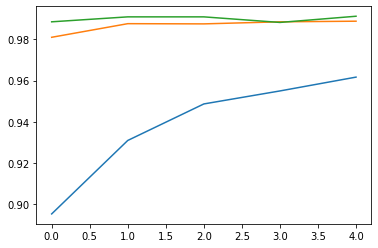

In [6]:
plt.plot(history_sgd.history['val_accuracy'], label='SGD')
plt.plot(history_adam.history['val_accuracy'], label='Adam')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSProp')
plt.title